## Lifecycle of data science projects
1. Data Collection Statergy
2. Feature Engineering

#### Different type of missing data
1. Missing Completely At Random,(MCAR) -> No relationship between variables. i.e there should be nothing like variable 
a is missing because variable b is missing
2. Missing Data Not at random -> Missing Variables have relationship
2. Missing At Random -> means there is a systematic relationship between the propensity of missing values and the observed data, but not the missing data i.e men will hide their salary and women hides their age.

In [185]:
%load_ext nb_black
import sys

sys.path.append("/Users/vikaspandey/my_projects/deeplearning_ai")
import pandas as pd

pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from data_visualisation.plot import Plot
from utils.utils import read_csv_in_pd
from utils.utils import get_or_drop_na_cols
from utils.utils import replace_categorical_nan_cols
from utils.utils import replace_numerical_nan_cols
from utils.utils import convert_categorical_to_one_hot_encoding
from utils.utils import get_cols_with_nan_values

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [91]:
train_data = read_csv_in_pd("titanic_dataset", "train.csv")

<IPython.core.display.Javascript object>

In [92]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<IPython.core.display.Javascript object>

In [93]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<IPython.core.display.Javascript object>

1. In this case __age__ and __cabin__ have missing values but we cannot categories them as MCAR because missing Age value and cabin values are related.

2. Embarked can be categoried as MCAR because it has no relationship with other variables.

In [94]:
train_data[train_data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<IPython.core.display.Javascript object>

__Age__ and __group__ can be categorised as Missing Data Not at random

In [95]:
train_data["cabin_null"] = np.where(train_data["Cabin"].isnull(), 1, 0)
train_data["cabin_null"].mean()

0.7710437710437711

<IPython.core.display.Javascript object>

In [96]:
train_data.groupby(["Survived"])["cabin_null"].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

<IPython.core.display.Javascript object>

### Techniques of handling missing values
1. __Mean/Median/Mode replacement(Frequently used)__
    1. This should be applied when data is missing completely at random.
        - __Advantages__:
            1. Easy to implement
            2. Faster way to obtain complete dataset
        - __Disadvantages__:
            1. Change or distortion of the original varience
            2. Impacts Corelation
2. __Random sample imputation(Frequently used)__
    1. Take random sample from dataset and replace all nan values with that. It assumes that the data are missing completely at random.
        - __Advantages__
            1. Easy to implement
            2. Less distortion in the variance
        - __Disadvantages__
            1. Randomness doesn't always work
3. __Capturing NAN values with a new feature__
    - __Advantages__
        1. Easy to implement
        2. Captures the importance of the missing value
    - __Disadvantages__
        1. Creating additional Feature(Curse of dimentionality)
4. __End of distribution imputation__
    - __Advantages__
        1. Captures the importance of missingness if there is one.
        2. Easy to implement
    - __Disadvantages__
        1. Distorts the original distribution of the variables
5. __Arbitrary Imputation__
    1. Involves replacing nan from some arbitrary value
    2. The value must not be frequently present.
6. __Frequent Categories imputation__.
    1. Should not be used when there are more number of missing cols.
        - __Advantages__
            1. easy to implement
            2. faster way to implement
        - __Disadvantages__
            1. It distorts the relationship
            2. The most frequent value wil be over represented if there are more number of nans.
7. __Replace nans with some other value like 0 or 'missing'__.

In [97]:
trimmed_data = train_data[["Age", "Fare", "Survived"]]

<IPython.core.display.Javascript object>

In [98]:
trimmed_data.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

<IPython.core.display.Javascript object>

In [99]:
# Random Sample Imputation
random_sample = (
    trimmed_data["Age"]
    .dropna()
    .sample(trimmed_data["Age"].isnull().sum(), random_state=0)
)
trimmed_data.loc[:, "Age_random"] = trimmed_data["Age"].copy()
random_sample.index = trimmed_data[trimmed_data["Age"].isnull()].index
trimmed_data.loc[trimmed_data["Age"].isnull(), "Age_random"] = random_sample.copy()

<IPython.core.display.Javascript object>

In [100]:
# Capturing NAN values with a new feature
trimmed_data.loc[:, "Age_NA"] = np.where(trimmed_data["Age"].isnull(), 1, 0).copy()
trimmed_data["Age"].fillna(trimmed_data.Age.median(), inplace=True)

<IPython.core.display.Javascript object>

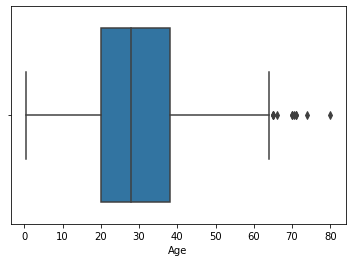

<IPython.core.display.Javascript object>

In [101]:
# End of distribution imputation
trimmed_data = train_data[["Age", "Fare", "Survived"]]
sns.boxplot("Age", data=trimmed_data)
extreme = trimmed_data.Age.mean() + 3 * trimmed_data.Age.std()
trimmed_data["Age_End_Of_Distribution"] = trimmed_data.Age.fillna(extreme)
trimmed_data.fillna(trimmed_data.Age.median(), inplace=True)

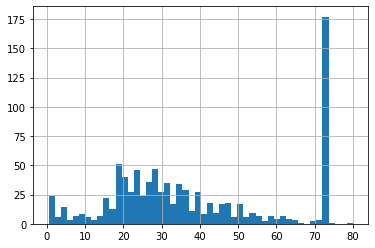

<IPython.core.display.Javascript object>

In [102]:
trimmed_data.Age_End_Of_Distribution.hist(bins=50)

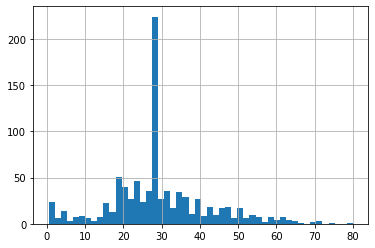

<IPython.core.display.Javascript object>

In [103]:
trimmed_data.Age.hist(bins=50)

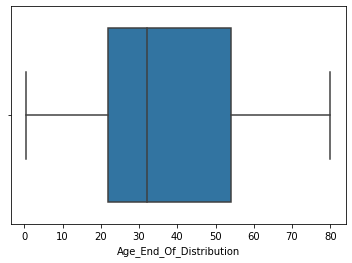

<IPython.core.display.Javascript object>

In [104]:
sns.boxplot("Age_End_Of_Distribution", data=trimmed_data)

In [106]:
# Arbitrary Value Imputation
trimmed_data = train_data[["Age", "Fare", "Survived"]]

<IPython.core.display.Javascript object>

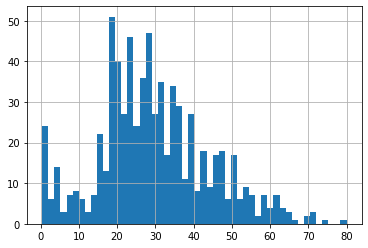

<IPython.core.display.Javascript object>

In [108]:
trimmed_data["Age"].hist(bins=50)

In [110]:
trimmed_data["Age_hundred"] = trimmed_data["Age"].fillna(100)

<IPython.core.display.Javascript object>

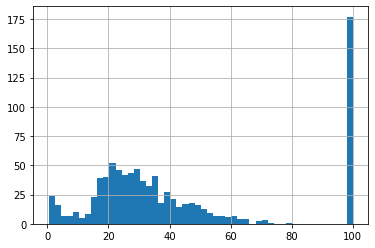

<IPython.core.display.Javascript object>

In [111]:
trimmed_data["Age_hundred"].hist(bins=50)

In [124]:
# Frequent Category Imputation
train_data = read_csv_in_pd("house-prices-advanced-regression-techniques", "train.csv")

<IPython.core.display.Javascript object>

In [125]:
df1 = train_data[["BsmtQual", "FireplaceQu", "GarageType", "SalePrice"]]

<IPython.core.display.Javascript object>

In [126]:
df1.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


<IPython.core.display.Javascript object>

In [127]:
df1.isnull().mean().sort_values(ascending=False)

FireplaceQu    0.472603
GarageType     0.055479
BsmtQual       0.025342
SalePrice      0.000000
dtype: float64

<IPython.core.display.Javascript object>

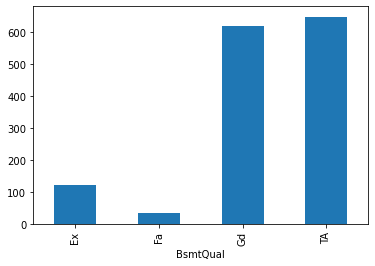

<IPython.core.display.Javascript object>

In [128]:
df1.groupby(["BsmtQual"])["BsmtQual"].count().plot.bar()

In [131]:
df1["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

<IPython.core.display.Javascript object>

In [132]:
def inpute_nan(df, variable):
    most_freq_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_freq_category, inplace=True)

<IPython.core.display.Javascript object>

In [135]:
for feature in ["BsmtQual", "FireplaceQu", "GarageType"]:
    inpute_nan(df1, feature)

<IPython.core.display.Javascript object>

In [136]:
df1.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

<IPython.core.display.Javascript object>

#### Handling Categorical Features

### 1. One Hot Encoding

In [142]:
train_data = read_csv_in_pd("titanic_dataset", "train.csv")
df = train_data["Sex"]
pd.get_dummies(df, drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


<IPython.core.display.Javascript object>

In [145]:
df = train_data["Embarked"]
df.dropna(inplace=True)

<IPython.core.display.Javascript object>

In [148]:
pd.get_dummies(df, drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


<IPython.core.display.Javascript object>

>__If there are n categories take n-1 categories__

### 2. One hot encoding with many categories in a feature
> __Take top most categorical features, one hot encode them and drop others__

mercedes_data = read_csv_in_pd("mercedes-benz-greener-manufacturing", "train.csv")

In [151]:
mercedes_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [176]:
df = mercedes_data[["X0", "X1", "X2", "X3", "X4", "X5", "X6"]]

<IPython.core.display.Javascript object>

In [177]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


<IPython.core.display.Javascript object>

In [178]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

<IPython.core.display.Javascript object>

In [179]:
indexes = df.X1.value_counts().sort_values(ascending=False).head(10).index

<IPython.core.display.Javascript object>

In [180]:
indexes

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

<IPython.core.display.Javascript object>

In [181]:
indexes = list(indexes)

<IPython.core.display.Javascript object>

In [182]:
for category in indexes:
    df[category] = np.where(df["X1"] == category, 1, 0)

<IPython.core.display.Javascript object>

In [184]:
df[indexes].head()

,aa,s,b,l,v,r,i,a,c,o
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


<IPython.core.display.Javascript object>

### 3. Ordinal Number System

In [186]:
today_date = datetime.datetime.today()

<IPython.core.display.Javascript object>

In [187]:
today_date

datetime.datetime(2020, 10, 29, 1, 36, 42, 222209)

<IPython.core.display.Javascript object>

In [190]:
days = [today_date - datetime.timedelta(x) for x in range(0, 15)]

In [194]:
data = pd.DataFrame(days)
data.columns = ["Day"]

<IPython.core.display.Javascript object>

In [202]:
data["weekday"] = data["Day"].dt.day_name()

<IPython.core.display.Javascript object>

In [208]:
d = {
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
    "Sunday": 7,
}

<IPython.core.display.Javascript object>

In [209]:
data["weekday_ordinal"] = data["weekday"].map(d)

<IPython.core.display.Javascript object>

In [210]:
data

,Day,weekday,weekday_ordinal
0,2020-10-29 01:36:42.222209,Thursday,4
1,2020-10-28 01:36:42.222209,Wednesday,3
2,2020-10-27 01:36:42.222209,Tuesday,2
3,2020-10-26 01:36:42.222209,Monday,1
4,2020-10-25 01:36:42.222209,Sunday,7
5,2020-10-24 01:36:42.222209,Saturday,6
6,2020-10-23 01:36:42.222209,Friday,5
7,2020-10-22 01:36:42.222209,Thursday,4
8,2020-10-21 01:36:42.222209,Wednesday,3
9,2020-10-20 01:36:42.222209,Tuesday,2


<IPython.core.display.Javascript object>

### 4. Count or Frequency Encoding

In [215]:
train_set = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    header=None,
    index_col=None,
)

<IPython.core.display.Javascript object>

In [223]:
columns = [1, 3, 5, 6, 7, 8, 9, 13]
train_set = train_set[columns]
train_set.columns = [
    "Employment",
    "Degree",
    "Status",
    "Designation",
    "family_job",
    "Race",
    "Sex",
    "Country",
]

<IPython.core.display.Javascript object>

In [224]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


<IPython.core.display.Javascript object>

In [225]:
for feature in train_set.columns:
    print(feature, ":", len(train_set[feature].unique()))

Employment : 9
Degree : 16
Status : 7
Designation : 15
family_job : 6
Race : 5
Sex : 2
Country : 42


<IPython.core.display.Javascript object>

In [228]:
country_map = train_set["Country"].value_counts().to_dict()

<IPython.core.display.Javascript object>

In [229]:
train_set["Country"] = train_set["Country"].map(country_map)

<IPython.core.display.Javascript object>

In [230]:
train_set.head(5)

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


<IPython.core.display.Javascript object>

#### Advantages
    1. Ease of Use.
    2. Not increasing feature space
#### Disadvantages
    1. If the frequencies are same it will provide the same weight.

### 5. Target Guided ordinal encoding.
1. Ordering the labels according to the target
2. Replace the labels by joint probablity of being 0 or 1

In [231]:
titanic_data = read_csv_in_pd("titanic_dataset", "train.csv")

<IPython.core.display.Javascript object>

In [232]:
df = titanic_data[["Cabin", "Survived"]]

<IPython.core.display.Javascript object>

In [233]:
df.head()

,Cabin,Survived
0,NaN,0
1,C85,1
2,NaN,1
3,C123,1
4,NaN,0


<IPython.core.display.Javascript object>

In [234]:
df["Cabin"].fillna("Missing", inplace=True)

<IPython.core.display.Javascript object>

In [235]:
df.head()

,Cabin,Survived
0,Missing,0
1,C85,1
2,Missing,1
3,C123,1
4,Missing,0


<IPython.core.display.Javascript object>

In [237]:
df["Cabin"] = df["Cabin"].astype(str).str[0]

<IPython.core.display.Javascript object>

In [241]:
ordinal_labels = df.groupby(["Cabin"])["Survived"].mean().sort_values().index

<IPython.core.display.Javascript object>

In [243]:
map_dict = {
   k:i for i, k in enumerate(ordinal_labels, 0) 
}

In [246]:
df["Cabin_ordinal_labels"] = df["Cabin"].map(map_dict)

<IPython.core.display.Javascript object>

In [247]:
df.head()

,Cabin,Survived,Cabin_ordinal_labels
0,M,0,1
1,C,1,4
2,M,1,1
3,C,1,4
4,M,0,1


<IPython.core.display.Javascript object>

### 6. Mean Encoding

In [252]:
df = titanic_data[["Cabin", "Survived"]]
df["Cabin"].fillna("Missing", inplace=True)

<IPython.core.display.Javascript object>

In [254]:
df["Cabin"] = df["Cabin"].astype(str).str[0]

<IPython.core.display.Javascript object>

In [263]:
mean_dict1 = df.groupby(["Cabin"])["Survived"].mean().to_dict()

<IPython.core.display.Javascript object>

In [264]:
mean_dict1

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

<IPython.core.display.Javascript object>

In [266]:
df["mean_ordinal_encode"] = df["Cabin"].map(mean_dict1)

<IPython.core.display.Javascript object>

### 6. Probablity Ratio Encoding

In [274]:
prob_df = df.groupby("Cabin")["Survived"].mean()
prob_df = pd.DataFrame(prob_df)
prob_df.head()

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000


<IPython.core.display.Javascript object>

In [276]:
prob_df["Died"] = 1 - prob_df["Survived"]

<IPython.core.display.Javascript object>

In [278]:
prob_df["probablity_ratio"] = prob_df["Survived"] / prob_df["Died"]

<IPython.core.display.Javascript object>

In [279]:
prob_df.head()

,Survived,Died,probablity_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


<IPython.core.display.Javascript object>

In [282]:
df["Cabin_encoded"] = df["Cabin"].map(prob_df["probablity_ratio"].to_dict())

<IPython.core.display.Javascript object>

In [283]:
df.head()

,Cabin,Survived,mean_ordinal_labels,mean_ordinal_encode,Cabin_encoded
0,M,0,1,0.299854,0.428274
1,C,1,4,0.593220,1.458333
2,M,1,1,0.299854,0.428274
3,C,1,4,0.593220,1.458333
4,M,0,1,0.299854,0.428274


<IPython.core.display.Javascript object>

#### 1. Transformation Of Features
- __Why transformation of features are required__.
    - This is because the algorithms like gradient descent etc works well with smaller values.
    - Transformation is not required in all ML algorithms. Its very much reuired when you are working with Gradient descent, KNN, ANN, CNN, RNN etc

- __Types and Transformation__
    1. Normalization And Standarisation.
    2. Scaling to Minimum and Maxmium values.
    3. Scaling to Median and Quantiles.
    4. Guassian Transformation
        - Logarithmic Transformation
        - Reciprocal Transformation
        - Square Root Transformation
        - Exponential Transformation
        - Box Cox Transformation

##### 1. Normalization And Standarisation
- We try to bring all the variables or features to a similar scale. Standarisation means centering the variable at zero. Z = (X - X_mean)/std

In [286]:
df = titanic_data[["Pclass", "Age", "Fare", "Survived"]]
df.head()

,Pclass,Age,Fare,Survived
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


<IPython.core.display.Javascript object>

In [287]:
df["Age"].fillna(df.Age.median(), inplace=True)

<IPython.core.display.Javascript object>

In [288]:
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>

In [292]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))

<IPython.core.display.Javascript object>

In [293]:
df_scaled.head()

,0,1,2,3
0,0.827377,-0.565736,-0.502445,-0.789272
1,-1.566107,0.663861,0.786845,1.266990
2,0.827377,-0.258337,-0.488854,1.266990
3,-1.566107,0.433312,0.420730,1.266990
4,0.827377,0.433312,-0.486337,-0.789272


<IPython.core.display.Javascript object>